# Import Libraries and Data

In [1]:
import numpy as np #NumPy is a library for dealing with linear algebra and adding support for large, multi-dimensional arrays and matrices.
import pandas as pd #Pandas is a library for data manipulation and analysis # data processing, CSV file I/O (e.g. pd.read_csv)

import datetime #datetime is a library for date and time manipulation
import pycountry_convert as pc #pycountry_conver is a library for countries

import sklearn #Sklearn is a library that provides many unsupervised and supervised learning algorithms.
import scipy.stats as stats #Scipy is a library for scientific computing and technical computing
import math #Scipy is a library for scientific computing and technical computing


import seaborn as sns #Seaborn is a library forstatistical data visualization
import matplotlib.pyplot as plt#Matplotlib is a plotting library 

import plotly
import chart_studio.plotly
import plotly.graph_objects as go


from bokeh.io import output_file, show
from bokeh.plotting import figure

In [2]:
%matplotlib notebook

In [82]:
df=pd.read_csv('coronavirus_dataset.csv') # Read the 'raw' train data

# EDA

In [94]:
df.shape

(2886, 7)

In [95]:
df.head()

,Province.State,Country.Region,Lat,Long,date,cases,type
0,NaN,Japan,36.0000,138.0000,2020-01-22,2,confirmed
1,NaN,South Korea,36.0000,128.0000,2020-01-22,1,confirmed
2,NaN,Thailand,15.0000,101.0000,2020-01-22,2,confirmed
3,Anhui,Mainland China,31.8257,117.2264,2020-01-22,1,confirmed
4,Beijing,Mainland China,40.1824,116.4142,2020-01-22,14,confirmed


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 7 columns):
Province.State    2251 non-null object
Country.Region    2886 non-null object
Lat               2886 non-null float64
Long              2886 non-null float64
date              2886 non-null object
cases             2886 non-null int64
type              2886 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 158.0+ KB


## Feature Extraction

### Datetime Features

In [97]:
#convert data typeto date 
df['date']= pd.to_datetime(df['date'])

In [98]:
#Extract Year, Month, and Day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [99]:
#Extract day of the week
df['dayofweek'] = df['date'].dt.dayofweek
df['dayofweek_name'] = df['date'].dt.weekday_name

In [100]:
#Extract week of the year
df['weekofyear'] = df['date'].dt.weekofyear

In [101]:
df['dayofweek'].unique()

array([2, 3, 4, 5, 6, 0, 1], dtype=int64)

### Continents Features

In [102]:
#group country by continent
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

### Latitude and Longitude Features

#### Haversine Distance Between the Two Lat/Lons:

In [103]:
def haversine_array(lat1, lng1, lat2, lng2): 
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2)) 
    AVG_EARTH_RADIUS = 6371 # in km 
    lat = lat2 - lat1 
    lng = lng2 - lng1 
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) *      np.sin(lng * 0.5) ** 2 
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d)) 
    return h

In [104]:
means_lat = df.groupby('Country.Region')['Lat'].mean()
means_long = df.groupby('Country.Region')['Long'].mean()

data_means = [means_lat,means_long]
df_m = pd.DataFrame(data=data_means)

In [105]:
df_m.filter(items=['China'])

Country.Region
Lat
Long


In [106]:
df['haversine_distance'] = df.apply(lambda x: round(haversine_array(33.067392, 113.230599, x['Lat'], x['Long']),0),axis=1)

### Manhattan Distance Between the two Lat/Lons:

In [107]:
def dummy_manhattan_distance(lat1, lng1, lat2, lng2): 
    a = haversine_array(lat1, lng1, lat1, lng2) 
    b = haversine_array(lat1, lng1, lat2, lng1) 
    return a + b

In [108]:
df['manhattan_distance'] = df.apply(lambda x: round(dummy_manhattan_distance(33.067392, 113.230599, x['Lat'], x['Long']),0),axis=1)

In [109]:
df.drop(columns=['Province.State','year'],axis=1, inplace=True)

# Statistical Analysis

In [110]:
df.describe().T # provide statistical data about the numerical parameters of the raw train data

,count,mean,std,min,25%,50%,75%,max
Lat,2886.0,32.088766,13.107444,-41.4545,27.6104,32.9711,39.3054,64.9631
Long,2886.0,92.127132,54.883111,-123.8695,102.7103,112.2922,117.9874,174.8860
cases,2886.0,53.718295,390.907583,-20.0000,2.0000,5.0000,16.0000,14840.0000
month,2886.0,2.020790,0.561859,1.0000,2.0000,2.0000,2.0000,3.0000
day,2886.0,15.025988,9.703955,1.0000,5.0000,15.0000,24.0000,31.0000
dayofweek,2886.0,2.959113,1.956651,0.0000,1.0000,3.0000,5.0000,6.0000
weekofyear,2886.0,7.339224,1.803223,4.0000,6.0000,7.0000,9.0000,10.0000
haversine_distance,2886.0,2535.439016,3180.208060,97.0000,624.0000,1082.0000,2402.0000,19490.0000
manhattan_distance,2886.0,3122.886348,3839.928554,126.0000,834.0000,1287.0000,3123.0000,20602.0000


<IPython.core.display.Javascript object>


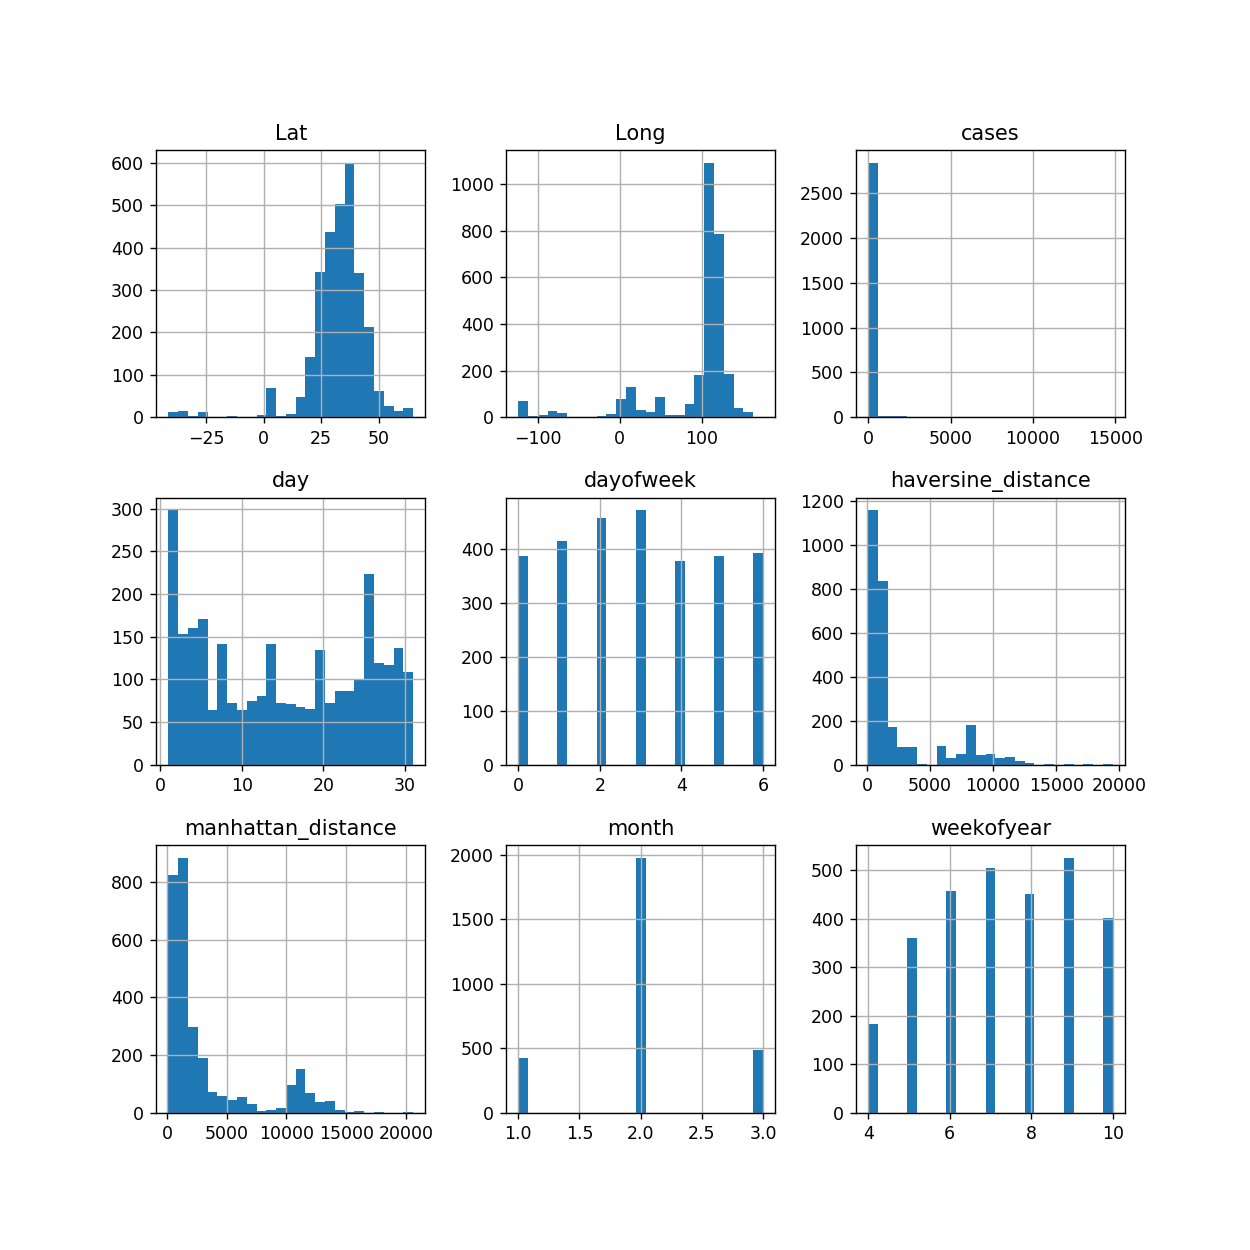

In [111]:
#  Plots a histograms of  parameters, while suppressing array output.
df_hist = df.hist(bins=25, figsize = (10,10))

# Data Visualization

In [112]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 10,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 12
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [115]:
fig = genSankey(df,cat_cols=['Country.Region','month','type'],value_cols='cases',title='Sankey Diagram - COVID-19')
plotly.offline.plot(fig, validate=False)

'temp-plot.html'

### Data Correlation

In [24]:
# compute the pair wise correlation for all columns
correlation_matrix = df.corr().round(1)

<IPython.core.display.Javascript object>


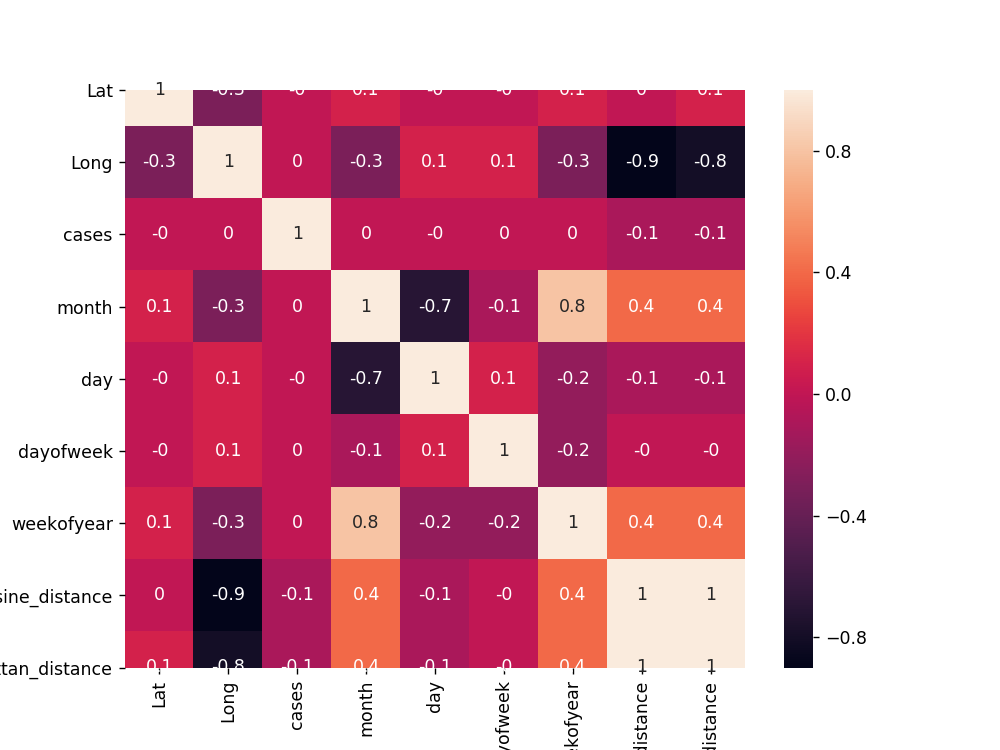

In [25]:
plt.subplots(figsize=(8,6))
corr_plot=sns.heatmap(data=correlation_matrix, annot=True) # Plot of the above correlation coefficietns between all numerical parameters

In [92]:
import plotly.express as px

fig = px.bar(df, x="date", y="cases", color='type')

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.layout.update({'title': 'Number of Cases - COVID-19'})
fig.show()

In [27]:
# create the bins
fig = px.bar(x=df['dayofweek'], y=df['cases'], labels={'x':'day_of_week', 'y':'cases'})
fig.show()

In [28]:
df['confirmed.cases'] = np.where(df['type'] == 'confirmed', df['cases'], 0)

In [29]:
df['death.cases'] = np.where(df['type'] == 'death', df['cases'], 0)

In [30]:
df['recovered.cases'] = np.where(df['type'] == 'recovered', df['cases'], 0)

In [91]:
fig = px.box(df, x="type", y="cases", color="type")
fig.layout.update({'title': 'Outliers - COVID-19 Cases '})
fig.show()